In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This will likely need to change everytime if your path looks different to mine... thats annoying

In [ ]:
PATH_TO_PROJECT = '/content/drive/Othercomputers/My Mac/Documents/Sem 2/IS833 Introduction to Data Analytics in Python/TEAM ASSIGNMENT/FAERS-analytics'

In [ ]:
%cd $PATH_TO_PROJECT

/content/drive/Othercomputers/My Mac/Documents/Sem 2/IS833 Introduction to Data Analytics in Python/TEAM ASSIGNMENT/FAERS-analytics


In [ ]:
!ls

 data   data-out  'FAERS analytics.ipynb'   README.md


In [ ]:
import os

output_path_dir = 'data-out/'
input_path_dir = 'data/'

if not os.path.isdir(output_path_dir):
  !mkdir $output_path_dir

for file in os.listdir(input_path_dir):
  if file.endswith(".zip"):
    input_path_file = input_path_dir + file
    output_path_file = output_path_dir + file.split('.zip')[0]
    if not os.path.isdir(output_path_file):
      !mkdir $output_path_file
      !unzip $input_path_file -d $output_path_file

In [ ]:
!ls $output_path_dir

FAERS_ASCII_2023_Q3  FAERS_ASCII_2023_Q4


In [ ]:
q3_dir = output_path_dir + 'FAERS_ASCII_2023_Q3/ASCII/'
!ls $q3_dir

ASC_NTS.pdf   DRUG23Q3.pdf  INDI23Q3.txt  REAC23Q3.pdf	RPSR23Q3.txt
DEMO23Q3.pdf  DRUG23Q3.txt  OUTC23Q3.pdf  REAC23Q3.txt	THER23Q3.pdf
DEMO23Q3.txt  INDI23Q3.pdf  OUTC23Q3.txt  RPSR23Q3.pdf	THER23Q3.txt


In [ ]:
q4_dir = output_path_dir + 'FAERS_ASCII_2023_Q4/ASCII/'
!ls $q4_dir

ASC_NTS.pdf   DRUG23Q4.pdf  INDI23Q4.txt  REAC23Q4.pdf	RPSR23Q4.txt
DEMO23Q4.pdf  DRUG23Q4.txt  OUTC23Q4.pdf  REAC23Q4.txt	THER23Q4.pdf
DEMO23Q4.txt  INDI23Q4.pdf  OUTC23Q4.txt  RPSR23Q4.pdf	THER23Q4.txt


In [ ]:
import pandas as pd

data = {}
directories = [q3_dir, q4_dir]


for directory in directories:
  for file in os.listdir(directory):
    if file.endswith(".txt"):
      input_path_file = './' + directory + file
      output_data_frame_name = file.split('.txt')[0]
      output_data_frame = pd.read_csv(input_path_file, sep='$')
      data[output_data_frame_name] = output_data_frame

data.keys()


<ipython-input-9-1f57bd4ffc9c>:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  output_data_frame = pd.read_csv(input_path_file, sep='$')


In [ ]:
for df_name, df in data.items():
    print('Current Table Name: ' + df_name)
    print('Current Table Shape: ' + str(df.shape))
    print('Current Table Snippet: \n')
    print(df.head())
    print ('\n\n -------------------------------------------------------------------------- \n\n')

Current Table Name: THER23Q3
Current Table Shape: (593027, 7)
Current Table Snippet: 

    primaryid    caseid  dsg_drug_seq    start_dt      end_dt     dur dur_cod
0   100051542  10005154             1  20120215.0         NaN     NaN     NaN
1  1001678123  10016781             1    201201.0    201204.0     NaN     NaN
2  1001678123  10016781             4  20120327.0         NaN     NaN     NaN
3  1001678123  10016781            10  20121005.0  20200121.0  2665.0     DAY
4  1001678123  10016781            12         NaN  20200121.0     NaN     NaN


 -------------------------------------------------------------------------- 


Current Table Name: RPSR23Q3
Current Table Shape: (11524, 3)
Current Table Snippet: 

   primaryid    caseid rpsr_cod
0  226642531  22664253       HP
1  226652471  22665247       HP
2  226653301  22665330      CSM
3  226653571  22665357      CSM
4  226655061  22665506      CSM


 -------------------------------------------------------------------------- 


Curre

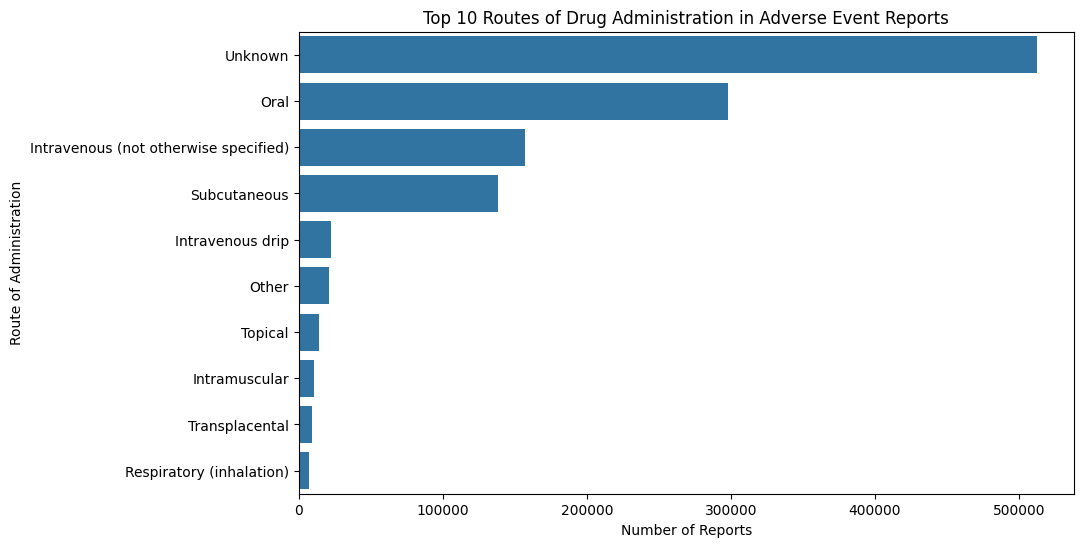

In [ ]:
# Most common routes of drug administration
route_counts = data['DRUG23Q3']['route'].value_counts().head(10)  # Taking the top 10 for visualization

plt.figure(figsize=(10, 6))
sns.barplot(x=route_counts.values, y=route_counts.index)
plt.title('Top 10 Routes of Drug Administration in Adverse Event Reports')
plt.xlabel('Number of Reports')
plt.ylabel('Route of Administration')
plt.show()

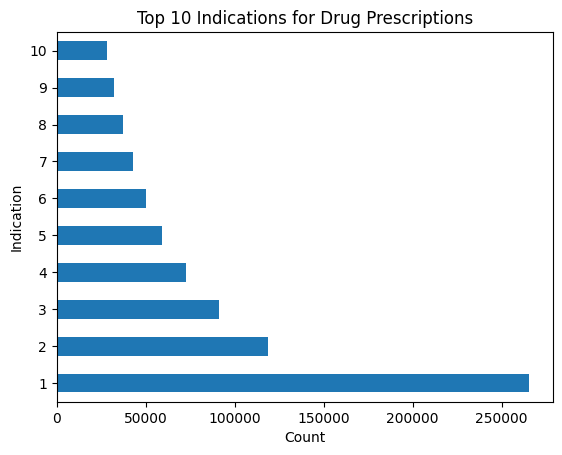

In [ ]:
# Merge the indications and outcomes dataframes on 'primaryid'
df_indi_outc = pd.merge(data['INDI23Q3'], data['OUTC23Q3'], on='primaryid', how='inner')

common_indications = df_indi_outc['indi_drug_seq'].value_counts().head(10)

# Plotting the top 10 indications
common_indications.plot(kind='barh')
plt.title('Top 10 Indications for Drug Prescriptions')
plt.xlabel('Count')
plt.ylabel('Indication')
plt.show()


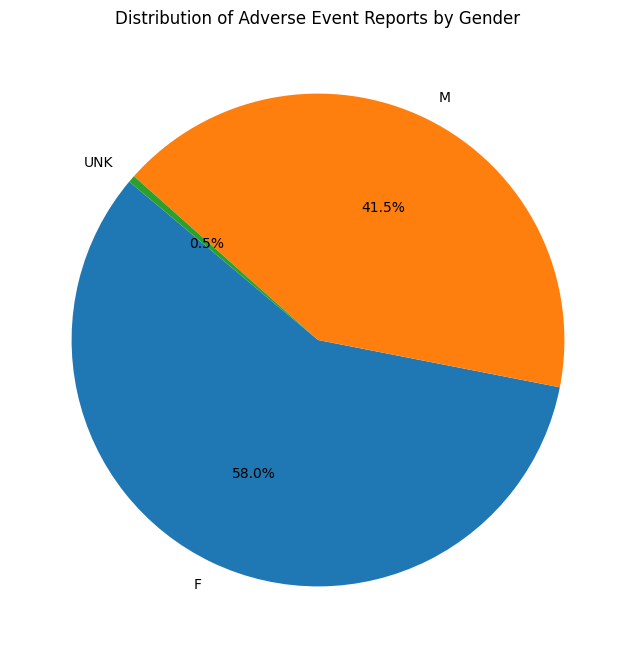

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_demo = data['DEMO23Q3']

#Plotting the distribution of adverse event reports by gender

gender_counts = df_demo['sex'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

plt.title('Distribution of Adverse Event Reports by Gender')

plt.show()


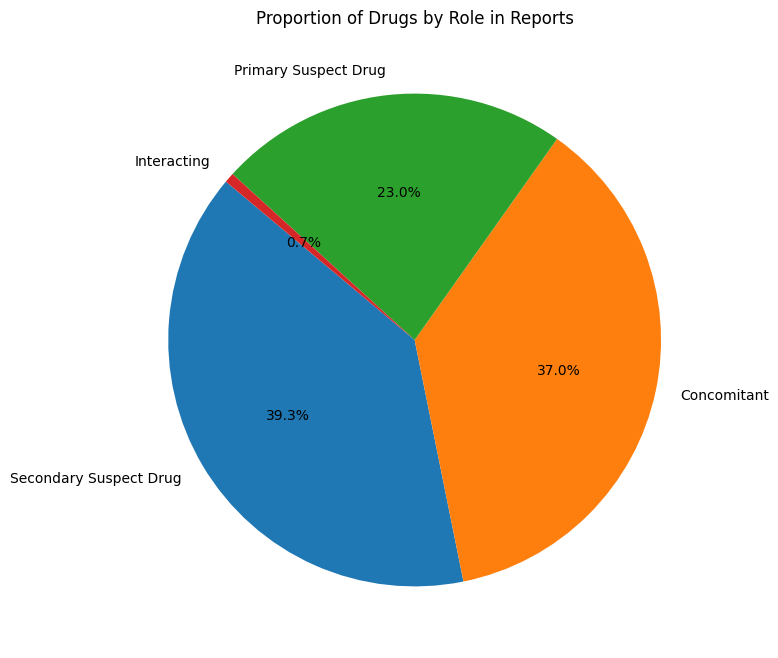

In [ ]:

# Mapping of role codes to their meanings
role_cod_definitions = {
    'PS': 'Primary Suspect Drug',
    'SS': 'Secondary Suspect Drug',
    'C': 'Concomitant',
    'I': 'Interacting'
}
# Proportion of drugs in reports by their role
role_counts = data['DRUG23Q3']['role_cod'].value_counts()

# Apply the role code definitions to the labels
labels_with_definitions = [role_cod_definitions.get(label, label) for label in role_counts.index]

plt.figure(figsize=(8, 8))
plt.pie(role_counts, labels=labels_with_definitions, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Drugs by Role in Reports')
plt.show()



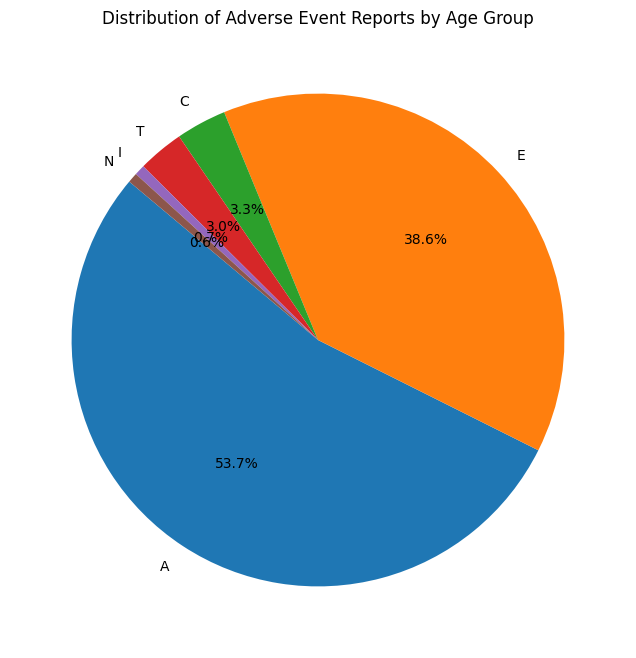

In [ ]:
# Age group distribution of adverse event reports
age_group_counts = data['DEMO23Q3']['age_grp'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Adverse Event Reports by Age Group')
plt.show()

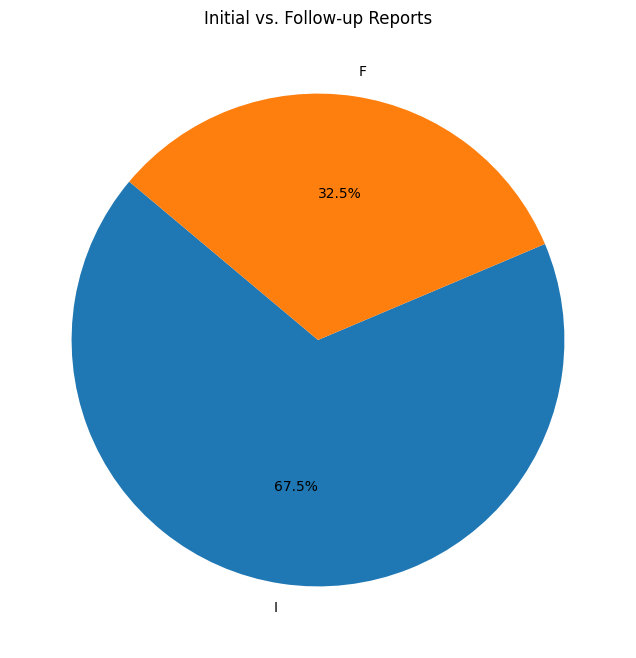

In [ ]:
# 4. Initial vs. follow-up reports
if_cod_counts = data['DEMO23Q3']['i_f_code'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(if_cod_counts, labels=if_cod_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Initial vs. Follow-up Reports')
plt.show()

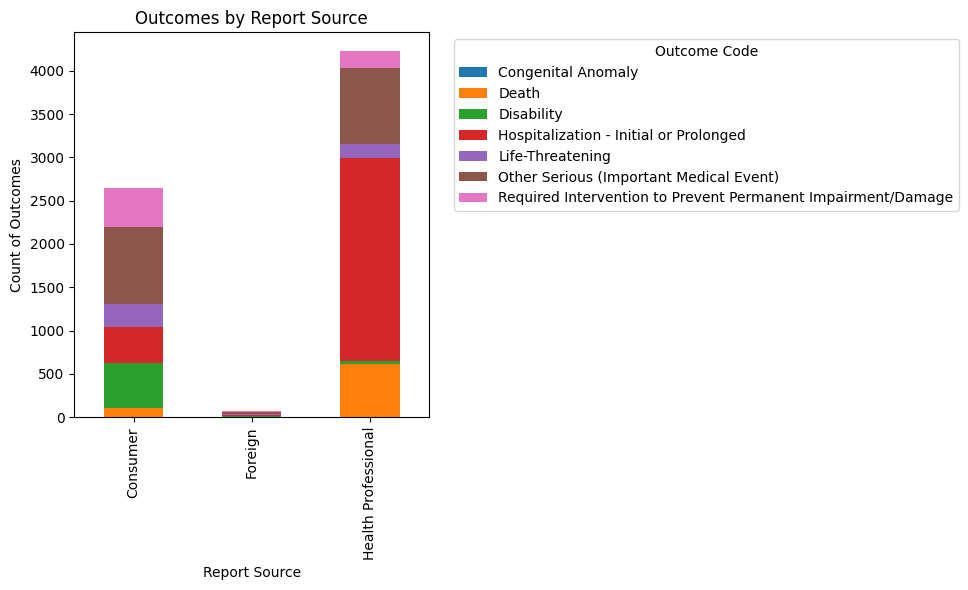

In [ ]:
# Mapping of report source codes to their full descriptions
report_source_definitions = {
    'FGN': 'Foreign',
    'SDY': 'Study',
    'LIT': 'Literature',
    'CSM': 'Consumer',
    'HP': 'Health Professional',
    'UF': 'User Facility',
    'CR': 'Company Representative',
    'DT': 'Distributor',
    'OTH': 'Other'
}

# Mapping of outcome codes to their full descriptions
outcome_code_definitions = {
    'DE': 'Death',
    'LT': 'Life-Threatening',
    'HO': 'Hospitalization - Initial or Prolonged',
    'DS': 'Disability',
    'CA': 'Congenital Anomaly',
    'RI': 'Required Intervention to Prevent Permanent Impairment/Damage',
    'OT': 'Other Serious (Important Medical Event)'
}


# Merge the report source and outcomes dataframes on 'primaryid'
df_rpsr_outc = pd.merge(data['RPSR23Q3'], data['OUTC23Q3'], on='primaryid', how='inner')

# Applying the mapping to the 'rpsr_cod' column
df_rpsr_outc['rpsr_cod'] = df_rpsr_outc['rpsr_cod'].map(report_source_definitions).fillna(df_rpsr_outc['rpsr_cod'])

# Applying the mapping to the 'outc_cod' column
df_rpsr_outc['outc_cod'] = df_rpsr_outc['outc_cod'].map(outcome_code_definitions).fillna(df_rpsr_outc['outc_cod'])

# Grouping by report source and counting outcomes
outcomes_by_source = df_rpsr_outc.groupby('rpsr_cod')['outc_cod'].value_counts().unstack().fillna(0)

# Visualizing the outcomes by report source
outcomes_by_source.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Outcomes by Report Source')
plt.xlabel('Report Source')
plt.ylabel('Count of Outcomes')
plt.legend(title='Outcome Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit the legend
plt.show()


In [12]:
# Load the data into DataFrames
outc = data['OUTC23Q3']
demo = data['DEMO23Q3']
drug = data['DRUG23Q3']

# Correct the column names according to the actual names in your DataFrames
# Then continue with your merge operation
merged = pd.merge(outc, demo[['PRIMARYID', 'CASEID', 'AGE', 'SEX', 'WT']], on=['PRIMARYID', 'CASEID'])
merged = pd.merge(merged, drug[['PRIMARYID', 'CASEID', 'DRUG_SEQ', 'ROLE_COD', 'DOSE_AMT', 'DOSE_UNIT', 'DOSE_FORM', 'DOSE_FREQ']], on=['PRIMARYID', 'CASEID'])

# Proceed with the rest of your analysis


# Create a pivot table to analyze the variations
outcome_pivot = pd.pivot_table(merged, index='OUTC_COD', columns=['ROLE_COD', 'DOSE_AMT', 'DOSE_UNIT', 'DOSE_FORM', 'DOSE_FREQ', 'AGE', 'SEX', 'WT'], aggfunc='size', fill_value=0)

# Visualize the variations
plt.figure(figsize=(16, 10))
sns.heatmap(outcome_pivot, annot=True, cmap='YlGnBu')
plt.title('Variations in Reported Outcomes')
plt.show()



KeyError: "None of [Index(['PRIMARYID', 'CASEID', 'AGE', 'SEX', 'WT'], dtype='object')] are in the [columns]"

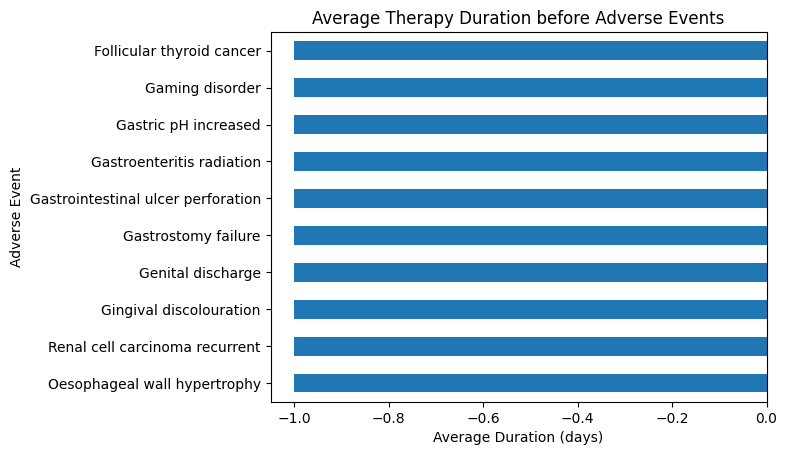

In [ ]:
# Assuming 'start_dt', 'end_dt' are in 'yyyy-mm-dd' format and available in 'df_ther'

df_ther = data['THER23Q3']

df_ther['duration'] = (pd.to_datetime(df_ther['end_dt']) - pd.to_datetime(df_ther['start_dt'])).dt.days

# Merge therapy duration data with adverse events
df_duration_reac = pd.merge(df_ther[['primaryid', 'duration']], df_reac, on='primaryid', how='inner')

# Assuming you're interested in the average duration leading to each adverse event
average_duration_per_reac = df_duration_reac.groupby('pt')['duration'].mean().sort_values()

# Plotting the durations for the top 10 adverse events
average_duration_per_reac.head(10).plot(kind='barh')
plt.title('Average Therapy Duration before Adverse Events')
plt.xlabel('Average Duration (days)')
plt.ylabel('Adverse Event')
plt.show()
